In [32]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from statistika_funkce import statb
plt.style.use('bmh')
from pylab import rcParams
from scipy import stats
rcParams['figure.figsize'] = 14, 8

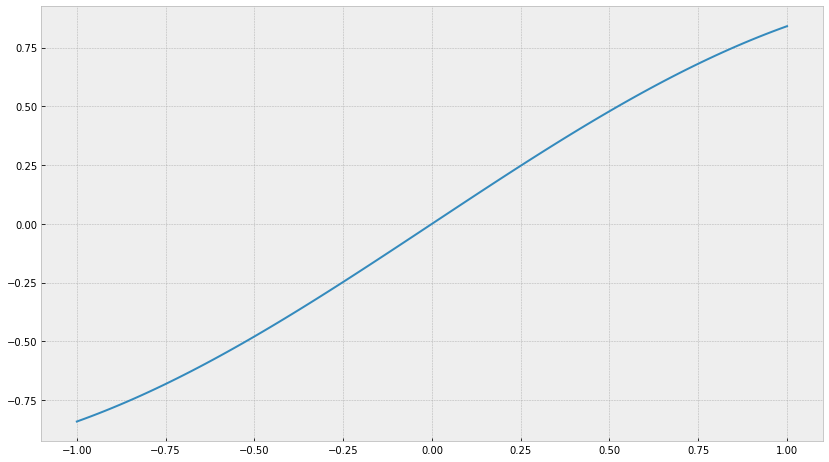

In [13]:
x = np.linspace(-1, 1, 100)
y = np.sin(x)
plt.plot(x, y)

In [17]:
s = "88 	83 	108 	67 	76 	78 	88 	45 	90 	69 	61"
s = s.split('\t')
s = np.array(s, dtype='float64')
s

array([ 88.,  83., 108.,  67.,  76.,  78.,  88.,  45.,  90.,  69.,  61.])

In [20]:
uloha_2 = pd.DataFrame(data=s, columns=['test'])

In [21]:
uloha_2

,test
0,88.0
1,83.0
2,108.0
3,67.0
4,76.0
5,78.0
6,88.0
7,45.0
8,90.0
9,69.0


In [22]:
mu_test = 73
std_test = 12


In [25]:
round(uloha_2.mean(), 1)

test    77.5
dtype: float64

In [97]:
round(uloha_2.sem(), 2)

test    5.09
dtype: float64

In [34]:
z = statb.z_stat_one_sample(uloha_2.mean(), mu_test, std_test, uloha_2.count())


test    1.256297
dtype: float64

In [93]:
stats.norm.interval(.90, loc=mu_test, scale=std_test)

(53.26175647658233, 92.73824352341767)

In [95]:
z = 1 - stats.norm.cdf(uloha_2.mean(), loc=mu_test, scale=std_test)
z

array([0.35242269])

# uloha 3

In [40]:
s2 = '5.3 	6.7 	5 	5.7 	5.3 	6.2 	6.5 	4.7'
s2 = s2.split('\t')
s2 = np.array(s2, dtype='float64')
s2

array([5.3, 6.7, 5. , 5.7, 5.3, 6.2, 6.5, 4.7])

In [50]:
uloha_3 = pd.DataFrame(data=s2, columns=['pacienti'])

In [51]:
uloha_3_mu_zero = 6.4
alpha = .1

In [52]:
round(uloha_3.mean(), 2), round(uloha_3.std(), 2)

(pacienti    5.68
 dtype: float64,
 pacienti    0.73
 dtype: float64)

In [53]:
t_3 = statb.t_stat_one_sample(uloha_3.mean(), uloha_3_mu_zero, uloha_3.std(), uloha_3.count())
t_3

pacienti   -2.822441
dtype: float64

In [56]:
t_test_u3 = stats.ttest_1samp(uloha_3['pacienti'], uloha_3_mu_zero)
round(t_test_u3.statistic, 2), round(t_test_u3.pvalue*2, 3)

(-2.82, 0.051)

# uloha 4

In [57]:
s4 = '31300 	30200 	29100 	26700 	31400 	33400 	27100 	29600 	31200 	28600 	34400 	24800'
s4 = s4.split('\t')
s4 = np.array(s4, dtype='float64')
s4

array([31300., 30200., 29100., 26700., 31400., 33400., 27100., 29600.,
       31200., 28600., 34400., 24800.])

In [61]:
uloha_4 = pd.DataFrame(data=s4, columns=['platy'])
alpha = 0.05
u4_std_zero = 3500
u4_popvar_zero = u4_std_zero**2
# two tail

In [63]:
round(uloha_4.mean())

platy    29817.0
dtype: float64

In [66]:
round(uloha_4.std())

platy    2778.0
dtype: float64

In [67]:
uloha_4.var()

platy    7.719697e+06
dtype: float64

In [76]:
chi2 = statb.chi2_stat_one_sample(uloha_4.var(), u4_popvar_zero, uloha_4.count())
round(chi2, 2)

platy    6.93
dtype: float64

In [82]:
chi2

platy    6.931973
dtype: float64

In [81]:
uloha_4.count() - 1

platy    11
dtype: int64

# uloha 5

In [83]:
s5_pred = '124 	93 	120 	106 	116 	77 	93 	113 	111 	102'
s5_pred = s5_pred.split('\t')
s5_pred = np.array(s5_pred, dtype='float64')
s5_pred

array([124.,  93., 120., 106., 116.,  77.,  93., 113., 111., 102.])

In [84]:
s5_po = '139 	95 	119 	156 	125 	143 	90 	131 	154 	128'
s5_po = s5_po.split('\t')
s5_po = np.array(s5_po, dtype='float64')
s5_po

array([139.,  95., 119., 156., 125., 143.,  90., 131., 154., 128.])

In [86]:
uloha_5 = pd.DataFrame(data={'pred': s5_pred, 'po': s5_po})
uloha_5.head()

,pred,po
0,124.0,139.0
1,93.0,95.0
2,120.0,119.0
3,106.0,156.0
4,116.0,125.0


In [88]:
stats.normaltest(uloha_5['pred']) # ANO

NormaltestResult(statistic=1.2458031594782075, pvalue=0.53638581124663)

In [89]:
stats.normaltest(uloha_5['po']) # ANO

NormaltestResult(statistic=0.8187687417756001, pvalue=0.6640589383378918)

In [90]:
stats.levene(uloha_5['pred'], uloha_5['po'])

LeveneResult(statistic=1.0514036182158457, pvalue=0.3187675055224881)

In [92]:
stats.ttest_rel(uloha_5['pred'], uloha_5['po'])

Ttest_relResult(statistic=-3.030075939891826, pvalue=0.014244936269920705)